 # Transaction amount generation

## 1. Define means

In [1]:
amount_means <- list(
   "Trading Cards" = 50,
   "Dachshunds" = 400,
   "Brass Animals" = 100
)

## 2. Generate amounts

In [2]:
generate_amount <- function(activity) {
  amount <-  round(rnorm(1, mean = as.numeric(amount_means[activity]), sd = as.numeric(amount_means[activity]) / 5))
  return(amount)
}

In [3]:
temp_data <- read.csv("../workingsets/temp_age_gender_status_salary_bank_activity.csv", header=TRUE)

activity <- temp_data$activity

new_amounts <- lapply(seq_len(length(activity)), function(i) {
  generate_amount(activity[i])
})

new_ages_genders_statuses_banks_activites_amounts <- data.frame(age = temp_data$age, gender = temp_data$gender, status = temp_data$status, salary = temp_data$salary, bank = temp_data$bank, activity = temp_data$activity, amount = unlist(new_amounts))

## 3. Plot amount means

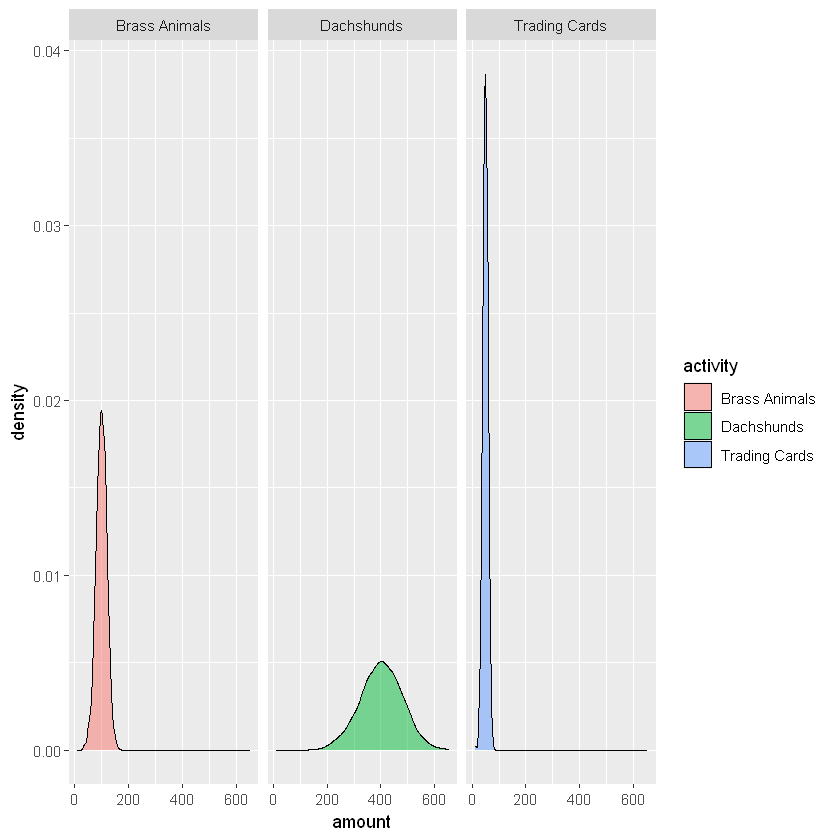

In [4]:
library(ggplot2)
ggplot(new_ages_genders_statuses_banks_activites_amounts, aes(x = amount, fill = activity)) + geom_density(alpha = 0.5) + facet_wrap(~ activity)

## 4. Export generated data

In [5]:
write.csv(new_ages_genders_statuses_banks_activites_amounts, file = "../workingsets/temp_age_gender_status_salary_bank_activity_amount.csv")